# Generatives Trainig mit DeepHull und Max-Distanz loss, generatives und normales Netz trainieren unabhängig voneinander
falls noch kein ICNN Netz exisitiert, kann eins gelernt werden, indem man init auf True setzt

In [39]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for


In [40]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 30
batch_size = 10

number_of_adversarial_samples = 1000
number_of_train_samples = 1000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

init = False

In [41]:
true_extremal_points = Rhombus().get_extremal_points()
if init:
    included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data= ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    random_samples = []
    for i in range(number_of_adversarial_samples): # generate random samples
        x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
        y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
        random_samples.append([[x, y]])

    value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

if init:
    torch.save(ambient_space, "../../ambient_space.pt")
    torch.save(included_space, "../../included_space.pt")
    torch.save(value, "../../value.pt")
else:
    icnn.load_state_dict(torch.load("../../icnn.pt"), strict=False)
    ambient_space = torch.load("../../ambient_space.pt").to(torch.float64)
    included_space = torch.load("../../included_space.pt").to(torch.float64)
    value = torch.load("../../value.pt").to(torch.float64)
    dataset = ConvexDataset(data=included_space)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    dataset = ConvexDataset(data=ambient_space)
    ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    adversarial_set = ConvexDataset(data=value)
    adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)

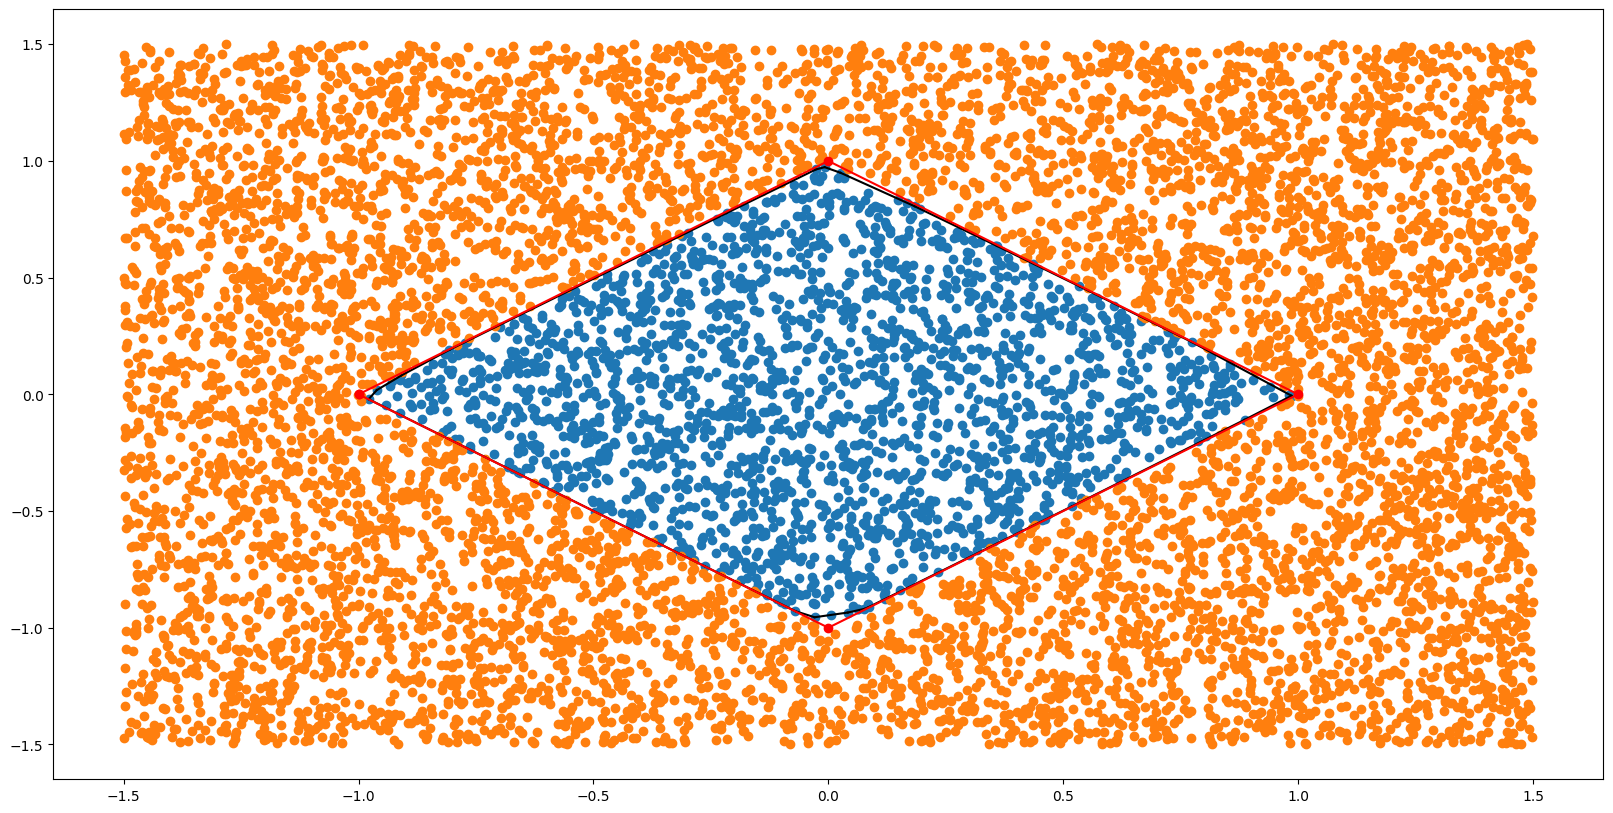

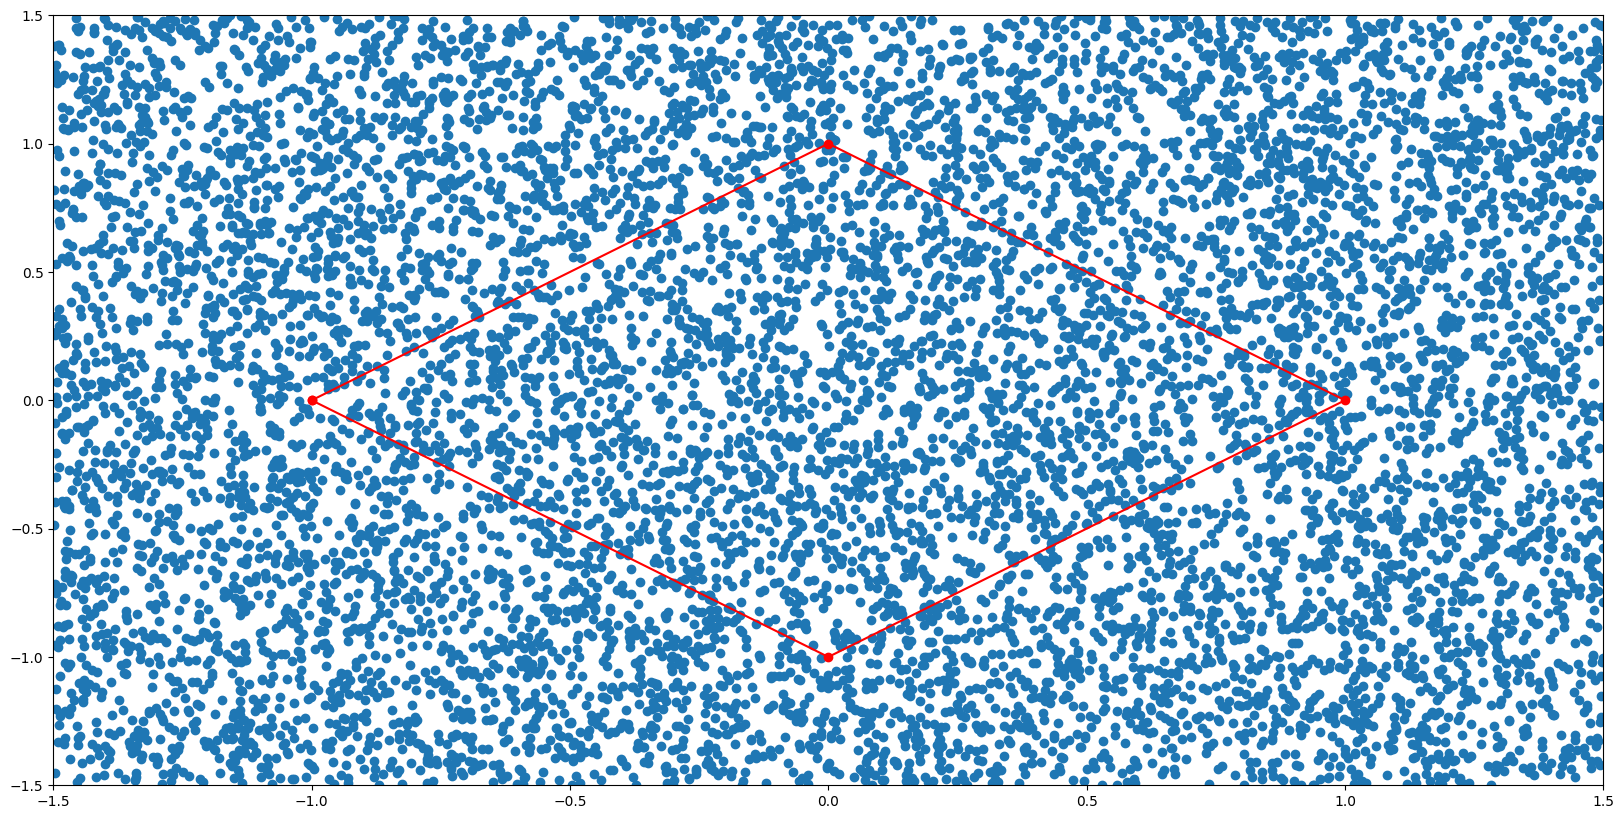

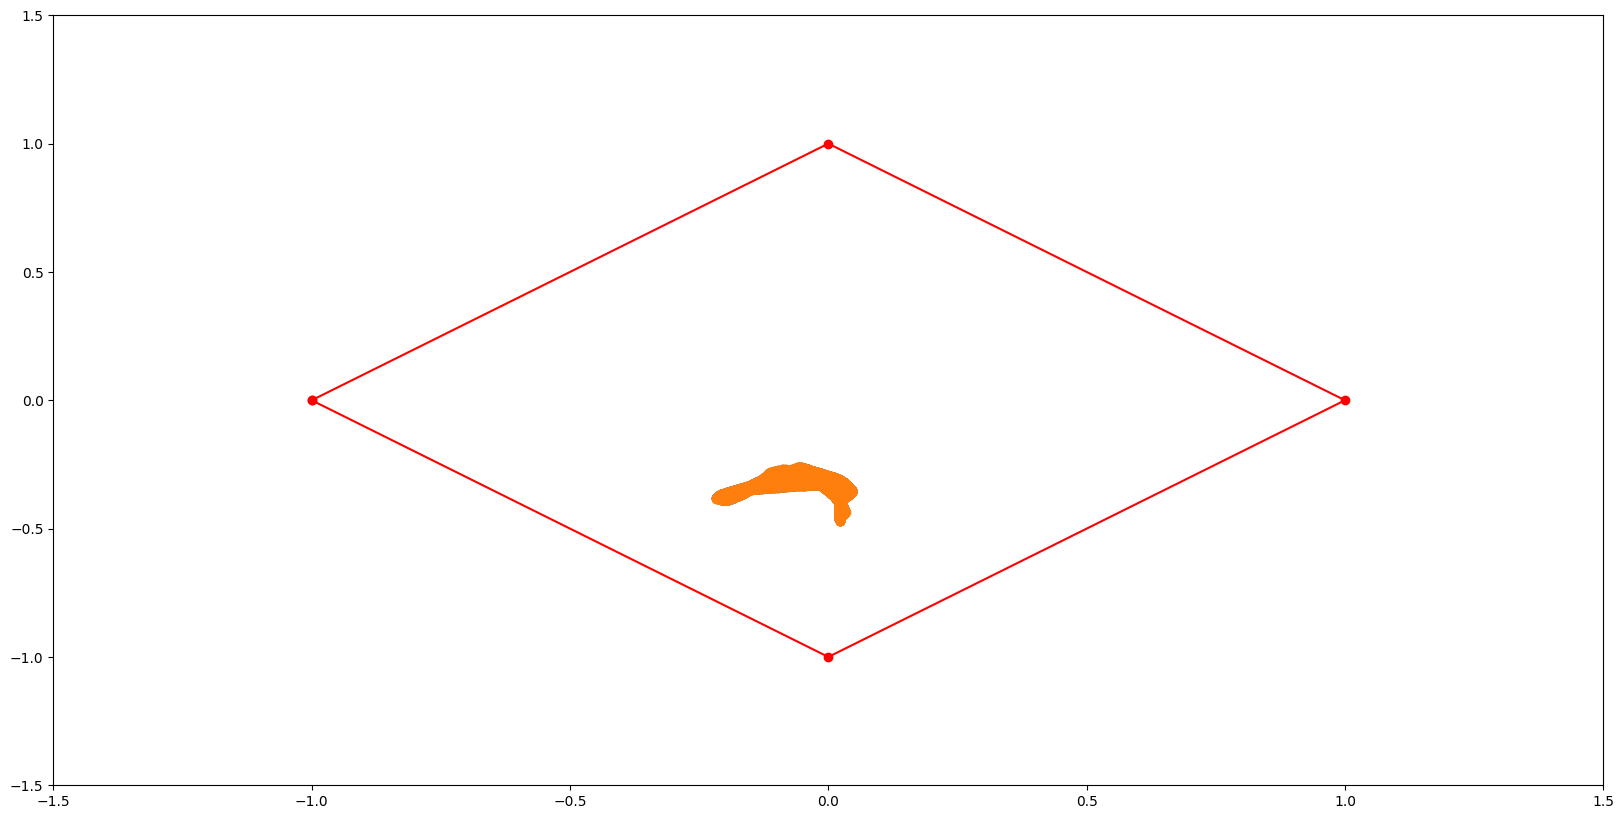

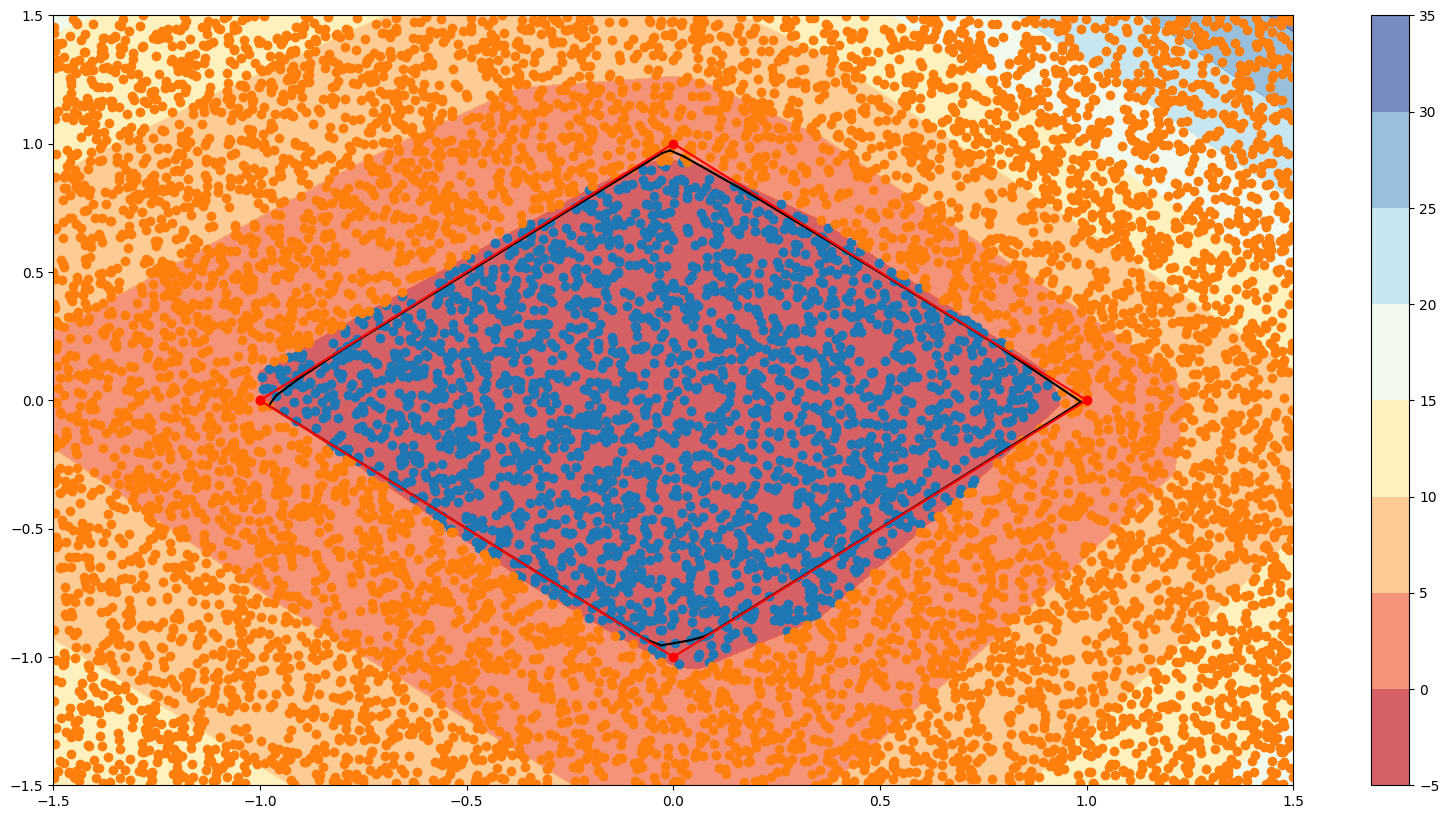

In [42]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()

if init:
    history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
    torch.save(icnn.state_dict(), "../../icnn.pt")
plots.plt_mesh()

=== Epoch: 0===
batch = 0, mean loss = 14.562400907015455, l_pos = 0.15655035761580433, l_neg = 0.0, l_gen = 14.40585054939965
batch = 100, mean loss = 13.000644072169628, l_pos = 0.19754551510891666, l_neg = 0.0, l_gen = 12.803098557060721
batch = 200, mean loss = 11.570064015151043, l_pos = 0.19651996361674023, l_neg = 0.0, l_gen = 11.373544051534306
batch = 221, mean loss = 11.311467259872213, l_pos = 0.19591142368213987, l_neg = 0.0, l_gen = 11.115555836190072
=== Epoch: 1===
batch = 0, mean loss = 8.928366740293225, l_pos = 0.203515140893937, l_neg = 0.0, l_gen = 8.724851599399287
batch = 100, mean loss = 8.086056794030103, l_pos = 0.19721271706603705, l_neg = 0.0, l_gen = 7.888844076964065
batch = 200, mean loss = 7.790678103927477, l_pos = 0.1954304206392153, l_neg = 0.0, l_gen = 7.595247683288257
batch = 221, mean loss = 7.752634421042729, l_pos = 0.19591142368213976, l_neg = 0.0, l_gen = 7.556722997360583
=== Epoch: 2===
batch = 0, mean loss = 7.0890885306610105, l_pos = 0.205

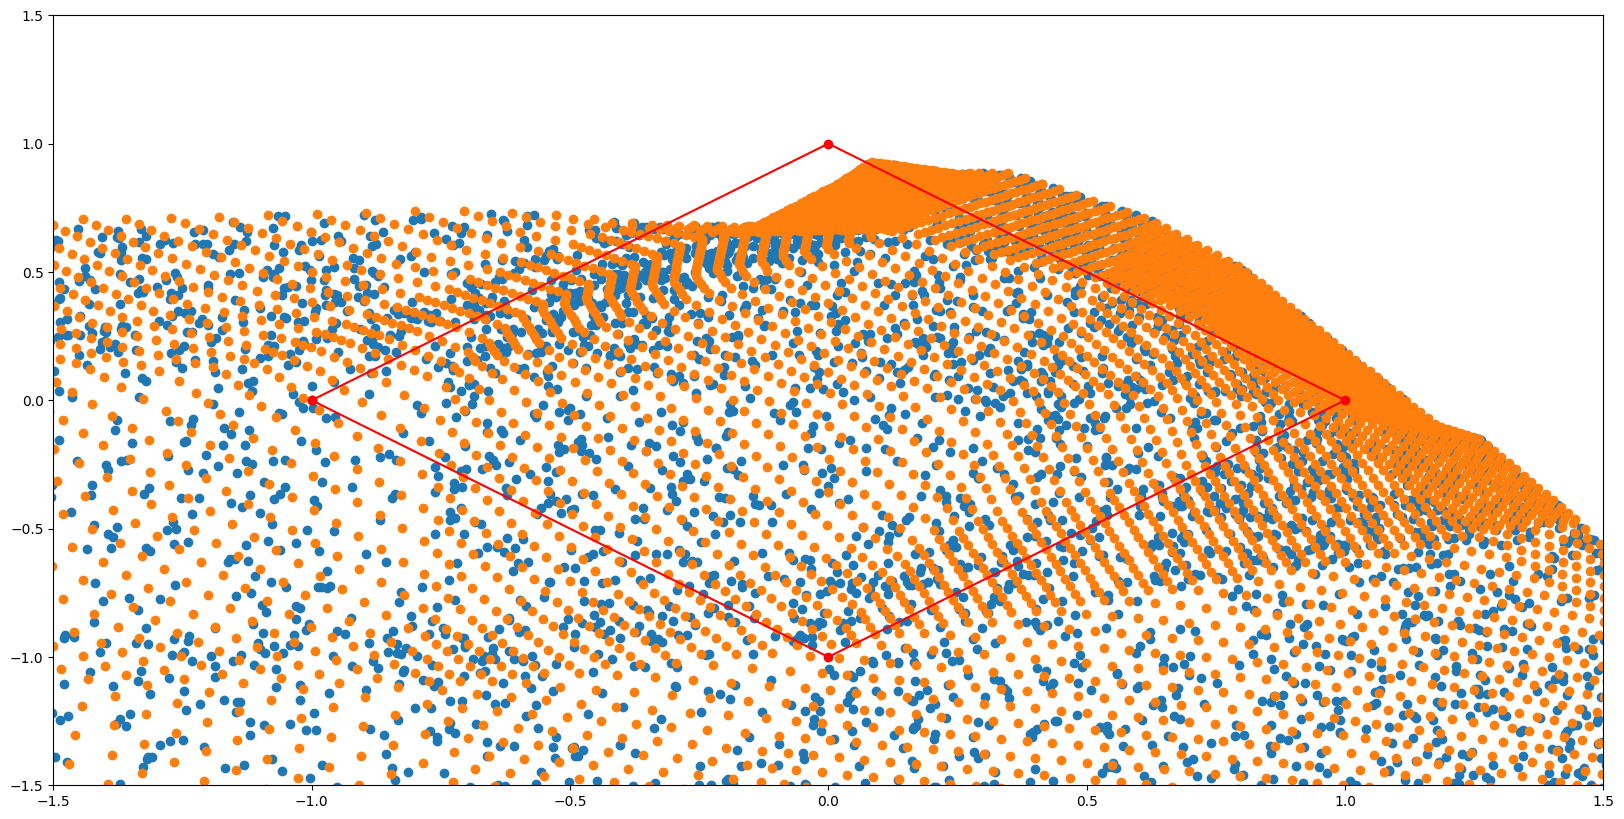

=== Epoch: 0===
batch = 0, mean loss = 7.689938809336792, l_pos = 0.15971492170787127, l_neg = 0.0, l_gen = 7.530223887628921
batch = 100, mean loss = 6.9009210220487, l_pos = 0.19944596877246093, l_neg = 0.0, l_gen = 6.701475053276238
batch = 200, mean loss = 6.934754817394604, l_pos = 0.1947826023947612, l_neg = 0.0, l_gen = 6.7399722149998444
batch = 221, mean loss = 6.927806501894319, l_pos = 0.19591142368213985, l_neg = 0.0, l_gen = 6.731895078212181
=== Epoch: 1===
batch = 0, mean loss = 7.453734375065796, l_pos = 0.2818336568782434, l_neg = 0.0, l_gen = 7.171900718187553
batch = 100, mean loss = 6.842737678268205, l_pos = 0.19601161203418999, l_neg = 0.0, l_gen = 6.646726066234021
batch = 200, mean loss = 6.797505526069281, l_pos = 0.19644067944763222, l_neg = 0.0, l_gen = 6.601064846621651
batch = 221, mean loss = 6.787585553408233, l_pos = 0.1959114236821399, l_neg = 0.0, l_gen = 6.591674129726096
=== Epoch: 2===
batch = 0, mean loss = 6.412360861467754, l_pos = 0.177224247575

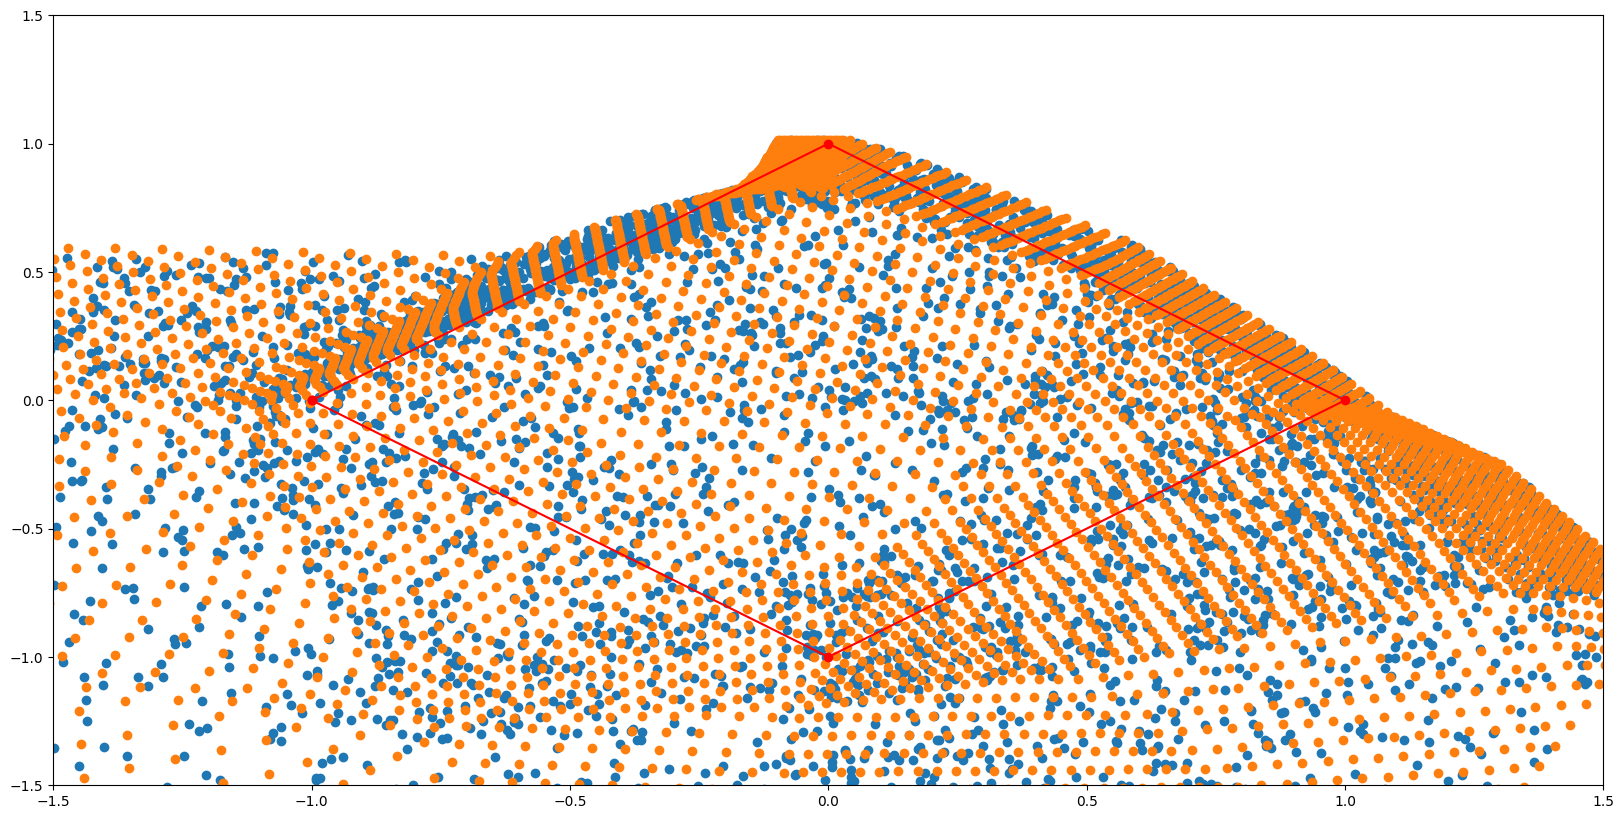

=== Epoch: 0===
batch = 0, mean loss = 6.412797422061795, l_pos = 0.24898285814129295, l_neg = 0.0, l_gen = 6.163814563920502
batch = 100, mean loss = 6.848568441313979, l_pos = 0.19635200733777197, l_neg = 0.0, l_gen = 6.652216433976206
batch = 200, mean loss = 6.771703893030992, l_pos = 0.19591028144454853, l_neg = 0.0, l_gen = 6.57579361158644
batch = 221, mean loss = 6.762679723131536, l_pos = 0.19591142368213982, l_neg = 0.0, l_gen = 6.566768299449393
=== Epoch: 1===
batch = 0, mean loss = 6.422473619721245, l_pos = 0.15639200503877992, l_neg = 0.0, l_gen = 6.266081614682465
batch = 100, mean loss = 6.877242740663112, l_pos = 0.19273997221672037, l_neg = 0.0, l_gen = 6.684502768446392
batch = 200, mean loss = 6.757821686436678, l_pos = 0.19602707382895515, l_neg = 0.0, l_gen = 6.561794612607725
batch = 221, mean loss = 6.768286423706881, l_pos = 0.19591142368213996, l_neg = 0.0, l_gen = 6.572375000024742
=== Epoch: 2===
batch = 0, mean loss = 7.351704737433008, l_pos = 0.181615316

KeyboardInterrupt: 

In [43]:
for i in range(int(epochs / 10)):
    history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=10, train_ICNN=False, hyper_lambda=hyper_lambda, use_max_distance=True)
    print("run {}".format(i))
    plots.plt_adversarial_dotted()